# Import the Mediapipe, cv2 packages

In [3]:
import mediapipe as mp
import cv2
import numpy as np
mp_drawing=mp.solutions.drawing_utils
mp_holistic=mp.solutions.holistic

In [4]:
# Webcam feed

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Holistic Model Detections', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [6]:
frame.shape

(480, 640, 3)

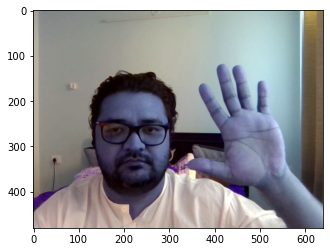

In [7]:
from matplotlib import pyplot as plt
plt.imshow(frame)
#Image captured in the frame is in BGR format

In [8]:
# Recolor the feed back to RGB to pass throgh Mediapipe model later
image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

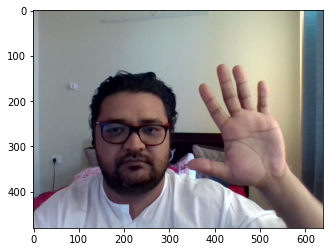

In [9]:
plt.imshow(image)

# How to make detections?

In [66]:
#How to make detections on webcam feed?
##Refer Mediapipe Holistic tutorial for static image feed
holistic=mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)
results=holistic.process(image)

In [67]:
##Lets store the detection results in a dictionary
detection_dictionary={
    "face_landmarks":results.face_landmarks,
    "left_hand_landmarks":results.left_hand_landmarks,
    "right_hand_landmarks":results.right_hand_landmarks,
    "pose_landmarks":results.pose_landmarks,
    "segmentation_mask":results.segmentation_mask,
}

In [70]:
##Read the reulst from the dictionary to see the detection coordinates
#If the image did not capture a portion of body image (ex Right hand), 
#the coordinates will not get captured, hence the results will not appear when you will call the object
detection_dictionary["left_hand_landmarks"]

landmark {
  x: 0.9344401359558105
  y: 0.7595996856689453
  z: -4.7105638145694684e-07
}
landmark {
  x: 0.8813687562942505
  y: 0.6399859189987183
  z: 0.0011331686982885003
}
landmark {
  x: 0.8094344735145569
  y: 0.5221890807151794
  z: -0.010093282908201218
}
landmark {
  x: 0.770484447479248
  y: 0.43222394585609436
  z: -0.022522490471601486
}
landmark {
  x: 0.7796555757522583
  y: 0.3474224805831909
  z: -0.033433083444833755
}
landmark {
  x: 0.7643046379089355
  y: 0.5134133100509644
  z: -0.0309476088732481
}
landmark {
  x: 0.6540118455886841
  y: 0.5934270620346069
  z: -0.054716646671295166
}
landmark {
  x: 0.6888815760612488
  y: 0.6130509376525879
  z: -0.0639800950884819
}
landmark {
  x: 0.7239741683006287
  y: 0.589713454246521
  z: -0.06970854848623276
}
landmark {
  x: 0.7733630537986755
  y: 0.5782706141471863
  z: -0.04598109424114227
}
landmark {
  x: 0.6589991450309753
  y: 0.6739029884338379
  z: -0.06434351205825806
}
landmark {
  x: 0.7015606760978699
  y

# Make Detections on Webcam feed or Video feed

In [ ]:
cap = cv2.VideoCapture('sample_2.mp4')
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Convert the feed from BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Refer the section above how to make detections on feed
        results = holistic.process(image)
  
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(120,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(120,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Draw Right hand landmarks
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Draw Left Hand landmarks
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Draw Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Holistic Model Detections', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()